<h1> Diagrams </h1>

To produce diagrams you need result data in either the 'summary df format' or the
MetricResult format. To get the data in this format see evaluation_metric_results.ipynb.

In [1]:
from sktime_estimator_evaluation.evaluation import metric_result_to_summary, evaluate_metric_results
import platform

def custom_classification(path: str):
    # Check os to determine split value
    if 'Windows' in platform.platform():
        split_subdir = path.split('\\')
    else:
        split_subdir = path.split('/')
    metric_name = 'ACC'
    file_name_split = split_subdir[-1].split('_')
    estimator_name = file_name_split[0]
    split = file_name_split[0].split('FOLDS')[0].lower()
    return estimator_name, metric_name, split

classification_results = evaluate_metric_results(
    '../results/', custom_classification
)


# Convert to summary df format to show different format
summary_df = metric_result_to_summary(classification_results)

# Both of the above formats are valid. More detail on both can be found in the
# evaluation_metric_result.ipynb notebook.

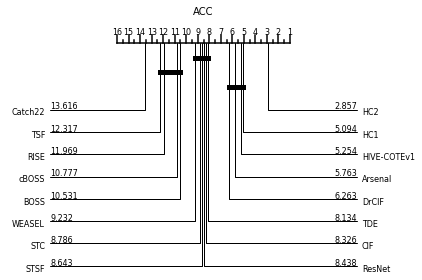

In [2]:
# Critical difference diagrams
from sktime_estimator_evaluation.evaluation.diagrams import critical_difference_diagram

figures = critical_difference_diagram(classification_results)

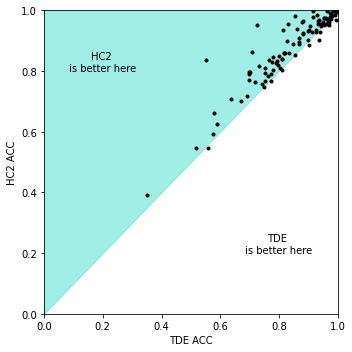

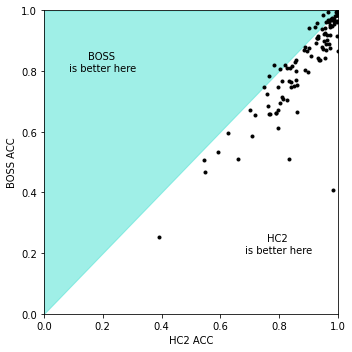

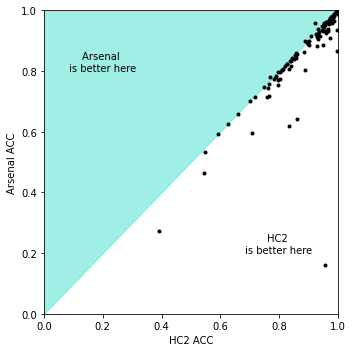

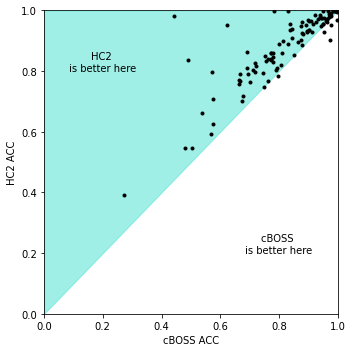

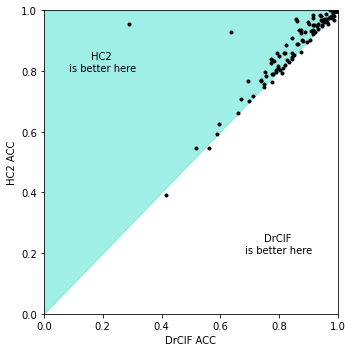

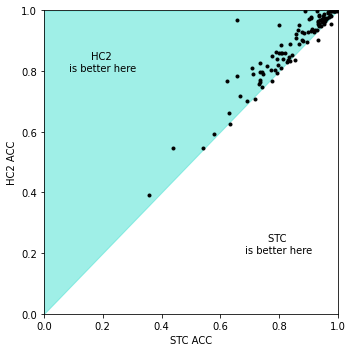

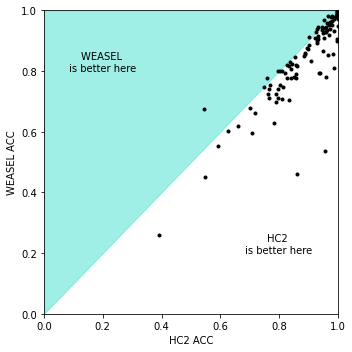

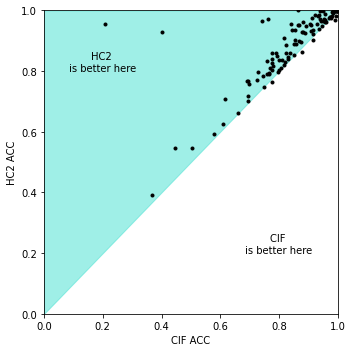

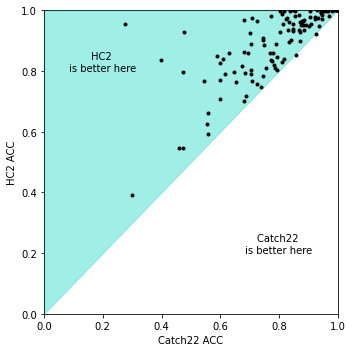

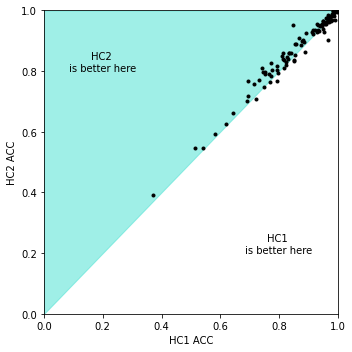

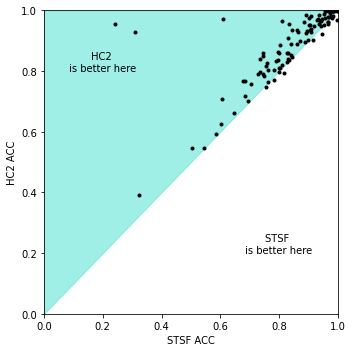

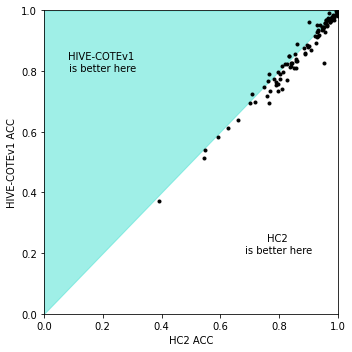

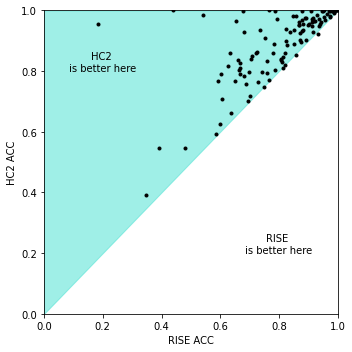

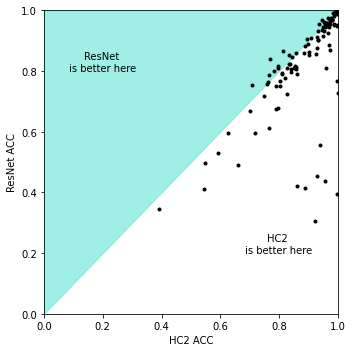

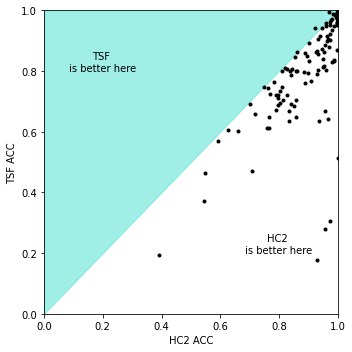

In [3]:
# Scatter diagrams
from sktime_estimator_evaluation.evaluation.diagrams import scatter_diagram

# By default the scatter diagram if not specified will be a scatter plot of EVERY,
# combination of estimator and metric. To only show a subset of the estimators and
# metrics we can specify which to compare and from
figures = scatter_diagram(classification_results, compare_estimators_to=['HC2'])